# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/Medetl/Simulacion/blob/main/Unidad%20II/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [21]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [22]:
interferencia()

0

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [23]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [24]:
X = prob_inter(500)                # Asignamos valores a n y realizamos el experimento

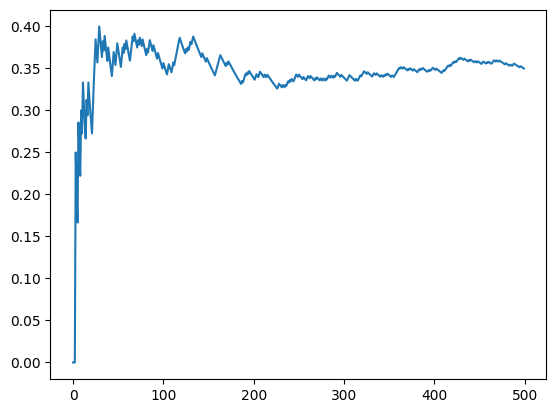

In [25]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [26]:
print(np.mean(X), np.std(X))

0.3472685266570901 0.03465247181425756


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [27]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [45]:
Y=modelo(120) #el número de experimentos es menor al número de simulaciones

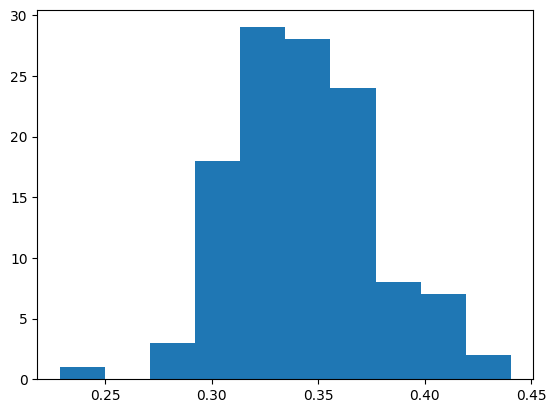

In [46]:
plt.hist(Y)
plt.show()

In [47]:
print(np.mean(Y), np.std(Y))

0.3431168344676 0.033132546827178


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [48]:
np.mean(Y)

0.3431168344676

In [49]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.3339329610401245, 0.3523007078950755)

Si seleccionamos nuestra muestra a partir de una población normal o, a falta de ésta, si $n$ es lo suficientemente grande, podemos establecer un intervalo de confianza para $\mu$ considerando la distribución muestral de $\bar X$
\
De acuerdo con el teorema del límite central, podemos esperar a que la distribución muestral de $\bar X$ esté distribuída de forma aproximadamente normal con media $\mu_{\bar x}=\mu$ y desviación estándar $\sigma_{\bar x}=\sigma / \sqrt{n}$.
\
Al escribir $z_{\alpha/2}$ para el valor de $z$ por arriba del cual encontramos un área de $\alpha/2$ bajo la curva normal
$$P(-z_{\alpha/2}<Z<z_{\alpha/2})=1-\alpha$$
donde
$$Z=\frac{\bar X-\mu}{\sigma/\sqrt{n}}$$
En consecuencia
$$P(-z_{\alpha/2} < \frac{\bar x-\mu_0}{\sigma/\sqrt{n}} < z_{\alpha/2})=1-\alpha$$
Si multiplicamos cada término en la desigualdad por $\sigma/\sqrt{n}$ y después restamos $\bar X$ de cada término, y enseguida multiplicamos por $-1$ (para invertir el sentido de las desigualdades).
$$P(\bar{X}-z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} < \mu < \bar{X}+z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{n}})=1-\alpha$$


**Intervalo de confianza de $\mu$ cuando se conoce $\sigma^2$**
\
Si $\bar x$ es la media de nuestra variable aleatoria de tamaño $n$ de una población de la que se conoce su varianza, lo que da un intervalo de confianza de $100(1-\alpha)\%$ para $\mu$ es
$$\bar{x}-z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{n}}$$
Donde $z_{\alpha/2}$ es el valor de $z$ que deja una área de $\alpha/2$ a la derecha

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

Teorema 1. Si utilizamos $\bar x$ como una estimación de $\mu$, podemos tener $100(1-\alpha)\%$ de confianza en que el error no excederá a $z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$
\
Con frecuencia queremos saber qué tan grande necesita ser una muestra para poder estar seguros de que el error al estimar $\mu$ será menor que una cantidad específica $\epsilon$. Por medio del teorema anterior debermos elegir n de manera que $z_{\alpha/2}\frac{\sigma}{\sqrt{n}}=\epsilon$. al resolver obtenemos

Teorema 2. Si usamos $\bar x$ como una estimación de $\mu$, podemos obtener $100(1-\alpha)\%$ de confianza de que el error no excederá a una cantidad específica $\epsilon$ cuando el tamaño de la muestra sea
$$n=(\frac{\sigma z_{\alpha/2}}{\epsilon})^2$$
\
Cuando resolvemos para la muestra con tamaño n, redondeamos todos los valores decimales al siguiente número entero. Si seguimos este principio, podemos estar seguros de que nuestro grado de confianza nunca caerá por debajo del $100(1-\alpha)\%$.

In [52]:
N = (2*np.std(X)*1.96/0.01)**2

In [53]:
print(N)

184.51877891928527


### Podemos comparar con la **solución analítica** del problema.

Para ello usamos el **teorema de resta de dos variables aleatorias normales**.

Si $X$ y $Y$ son variables aleatorias independientes y normalmente distribuidas, es decir\
$$X\sim N(\mu_X,\sigma_X)$$
entonces la diferencia $X-Y$ también está normalmente distribuida.
$$Z\sim N(\mu_X-\mu_Y,\sigma^2_X+\sigma^2_Y)$$
\
Tenemos:\
$$x_1\sim N(1.5,0.04)$$
$$x_2\sim N(1.48,0.03)$$

Queremos saber la probabilidad de interferencia. Hay interferencia cuando el diámetro de la flecha es más grande que el cojinete, es decir: $$x_2>x_1$$
$$x_2-x_1>0$$

$x_2$ y $x_1$ son variables aleatorias independientes y normalmente distribuidas, su diferencia resulta:
$$x_3\sim N(\mu_{x2}-\mu_{x1},\sigma^2_{x2}+\sigma^2_{x1})$$
\
$$\mu_{x2}-\mu_{x1}=1.48-1.50=-0.02=\mu_3$$
$$\sqrt{\sigma^2_{x1}+\sigma^2_{x2}}=\sqrt{0.03^2+0.04^2}=0.05=\sigma_3$$
\
$$x_3\sim N(-0.02,0.05)$$
$x_3$ es una variable aleatoria normal $z$ con media $-0.02$ y varianza $0.05^2$.
\
Así
$$P(interferencia)=P(x_2-x_1>0)=P(x_3>0)$$
Hacemos la transformación en Z
$$Z=\frac{X-\mu}{\sigma}$$
$$Z=\frac{0-(-0.02)}{0.05}=0.04$$
\
$$P(Z>0.4)=\phi(0.4)$$
El valor de $\phi(0.4)$ lo sacamos de la tabla de áreas bajo la curva normal.
Entonces
$$P(x_3>0)=1-\phi(0.4)$$
$$1-0.6554=0.3446$$
Es decir, el valor $\phi(0.4)$ deja un área de $0.6554$ a la derecha, entonces a la izquierda deja un área de $0.3446$. En conclusión
$$P(Interferencia)=0.3446=34.46\%$$


In [54]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

La funcion norm.cdf devuelve el valor de la función acumulativa en el punto especificado, lo que representa la probabilidad de que una variable aleatoria normal sea menor o igual a ese punto.
\
En este caso $x_3$ con media $-0.02$ y desviación estándar $0.05$ sea menor o igual a $-0.04$

In [55]:
error=norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)
abs(error)

0.0014614239220758218

El intervalo de confianza del $100(1-\alpha)\%$ ofrece un estimado de la precisión de la estimación puntual. Si $\mu$ es realmente el valor central del intervalo entonces $\bar x$ estima $\mu$ sin error. La mayoría de veces, sin embargo, $\bar x$ no será exactamente igual a $\mu$ y la estimación puntual será errónea. La magnitud de este error será el valor absoluto de la diferencia entre $\mu$ y $\bar x$, de manera que podemos tener $100(1-\alpha)\%$ de confianza en que esta diferencia no excederá a $z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$